Using TensorFlow’s gradient tape, fit a regression line (dataset provided) and update the weights using backpropagation by calculating the gradient.

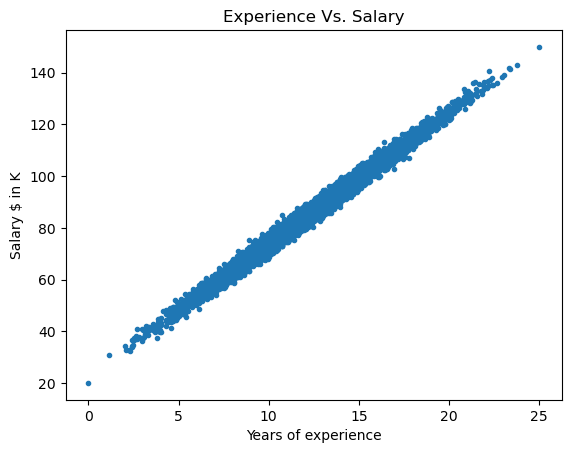

In [5]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X, Y, coef = datasets.make_regression(
    n_samples=10000,#number of samples
    n_features=1,#number of features
    n_informative=1,#number of useful features
    noise=1,#bias and standard deviation of the guassian noise
    coef=True,#true coefficient used to generated the data
    random_state=0) #set for same data points for each run

# Scale feature x (years of experience) to range 0..20
X = np.interp(X, (X.min(), X.max()), (0, 25))
X = X[:,0]

# Scale target y (salary) to range 20k..150k 
Y = np.interp(Y, (Y.min(), Y.max()), (20, 150))

plt.ion() #interactive plot on
plt.plot(X,Y,'.',label='training data')
plt.xlabel('Years of experience');plt.ylabel('Salary $ in K')
plt.title('Experience Vs. Salary')
plt.show()

In [6]:
#!pip3 install tensorflow
#!pip3 install sklearn

In [7]:
from sklearn.model_selection import train_test_split


# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size=0.25,
    shuffle=True,
    random_state=21)

In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import numpy as np


weight = tf.Variable(np.random.rand())
bias = tf.Variable(np.random.rand())

    
def compute_mse(Y_pred, Y):
    squared_error = tf.square(Y_pred - Y)
    mse = tf.reduce_mean(squared_error)
    return mse

# y = w.x+b
def predict(X, w, b):
    Y_pred =  w * X + b
    return Y_pred

#first derivative of loss function over w & b
def compute_gradient(X, Y, w, b):
    with tf.GradientTape() as g:
        Y_pred = predict(X, w, b)
        loss_value = compute_mse(Y_pred, Y)
    (dW, dB) = g.gradient(loss_value, [w, b])
    return dW, dB, loss_value

learning_rate = 0.001
for epoch in range(0, 10000):
    (dW, dB, loss_value) = compute_gradient(X_train, Y_train, weight, bias)
    
    dW = learning_rate * dW
    dB = learning_rate * dB
    weight.assign_sub(dW)
    bias.assign_sub(dB)
    
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch}, loss {loss_value:.3f}, w: {weight.numpy()}, b: {bias.numpy()}")
        

Y_test_pred = predict(X_test, weight, bias)
print("test_loss", compute_mse(Y_test_pred, Y_test))

Epoch: 0, loss 6208.720, w: 2.650026321411133, b: 0.5331085920333862
Epoch: 1000, loss 27.638, w: 6.558849334716797, b: 3.557880163192749
Epoch: 2000, loss 21.945, w: 6.378839492797852, b: 5.935142993927002
Epoch: 3000, loss 17.574, w: 6.221119403839111, b: 8.018037796020508
Epoch: 4000, loss 14.219, w: 6.0829291343688965, b: 9.843018531799316
Epoch: 5000, loss 11.643, w: 5.961850643157959, b: 11.442012786865234
Epoch: 6000, loss 9.666, w: 5.855765342712402, b: 12.843008995056152
Epoch: 7000, loss 8.148, w: 5.762815475463867, b: 14.070530891418457
Epoch: 8000, loss 6.983, w: 5.681375503540039, b: 15.146049499511719
Epoch: 9000, loss 6.088, w: 5.610019683837891, b: 16.088396072387695
test_loss tf.Tensor(5.431762, shape=(), dtype=float32)


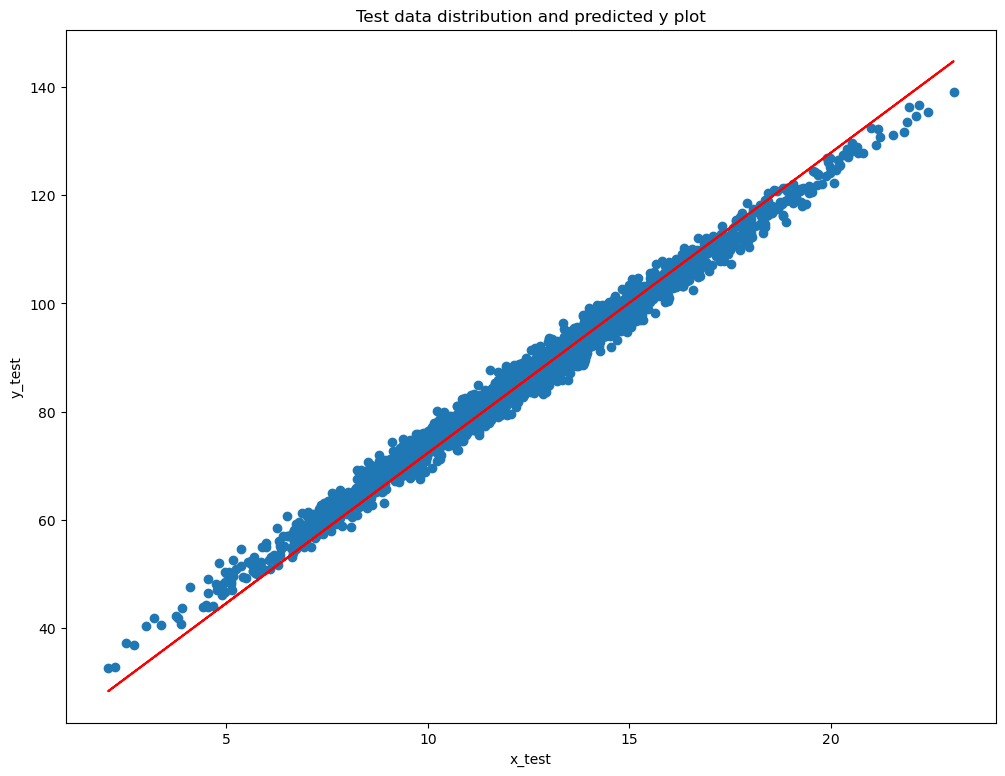

In [18]:
# predicted y on on the test set
Y_test_pred = weight.numpy()*X_test + bias.numpy()
# plot the predicted y values on the test data distribution
plt.figure(figsize=(12, 9))
plt.plot(X_test, Y_test_pred, c='red')
plt.scatter(X_test, Y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Test data distribution and predicted y plot')
plt.show()